<a href="https://colab.research.google.com/github/PratyushaChatterjee/ML-works/blob/main/Data_Cleaning_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
from google.colab import drive
drive.mount("/content/drive")



Mounted at /content/drive


In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
# loading the csv data to a Pandas DataFrame
data = pd.read_csv('/content/drive/My Drive/movies.csv')
# print first 5 rows of the dataset
data.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
# print last 5 rows of the dataset
data.tail()



,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN
9998,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


In [5]:
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [7]:
data.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [8]:
# Handle missing values
# Option 1: Drop rows with missing values
data_cleaned = data.dropna()
print(data_cleaned)


                                                 MOVIES        YEAR  \
77                               The Hitman's Bodyguard      (2017)   
85                                        Jurassic Park      (1993)   
95                                        Don't Breathe      (2016)   
111   The Lord of the Rings: The Fellowship of the Ring      (2001)   
125                                         Escape Room  (I) (2019)   
...                                                 ...         ...   
5750                           Vidal Sassoon: The Movie      (2010)   
5770                                       Men at Lunch      (2012)   
5835                                    Decoding Deepak      (2012)   
6056                                     Theo Who Lived      (2016)   
6292                                   Southern Justice      (2006)   

                                          GENRE  RATING  \
77          \nAction, Comedy, Crime                 6.9   
85      \nAction, Adventure, 

In [9]:
# Option 2: Impute missing values
print("\nMissing values after cleaning:")
print(data_cleaned.isnull().sum())




Missing values after cleaning:
MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
RunTime     0
Gross       0
dtype: int64


In [10]:
duplicate_rows = data_cleaned.duplicated()
print(f"\nNumber of duplicate rows: {duplicate_rows.sum()}")




Number of duplicate rows: 0


In [11]:
# Drop duplicate rows
data_cleaned = data_cleaned.drop_duplicates()
print("\nShape of the dataset after dropping duplicates:")
print(data_cleaned.shape)








Shape of the dataset after dropping duplicates:
(460, 9)


In [12]:
# Convert categorical data to numerical (if there are any)
# If there are categorical columns, use pd.get_dummies() to convert them
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)
print(data_cleaned)



      RATING  RunTime  MOVIES_127 Hours  MOVIES_17 filles  \
77       6.9    118.0             False             False   
85       8.1    127.0             False             False   
95       7.1     88.0             False             False   
111      8.8    178.0             False             False   
125      6.4     99.0             False             False   
...      ...      ...               ...               ...   
5750     6.5     90.0             False             False   
5770     6.3     75.0             False             False   
5835     5.5     83.0             False             False   
6056     6.8     86.0             False             False   
6292     3.1     96.0             False             False   

      MOVIES_2001: A Space Odyssey  MOVIES_300  MOVIES_300: Rise of an Empire  \
77                           False       False                          False   
85                           False       False                          False   
95                      

In [13]:
# Normalize/Standardize numerical data
scaler = StandardScaler()
numerical_features = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_cleaned[numerical_features] = scaler.fit_transform(data_cleaned[numerical_features])

print("\nFirst 5 rows of the cleaned dataset:")
print(data_cleaned.head())







First 5 rows of the cleaned dataset:
       RATING   RunTime  MOVIES_127 Hours  MOVIES_17 filles  \
77   0.278715  0.541400             False             False   
85   1.555487  0.962794             False             False   
95   0.491511 -0.863247             False             False   
111  2.300270  3.350694             False             False   
125 -0.253273 -0.348210             False             False   

     MOVIES_2001: A Space Odyssey  MOVIES_300  MOVIES_300: Rise of an Empire  \
77                          False       False                          False   
85                          False       False                          False   
95                          False       False                          False   
111                         False       False                          False   
125                         False       False                          False   

     MOVIES_A Cinderella Story  MOVIES_A Man Apart  \
77                       False               Fal

In [15]:
data_cleaned.to_csv('movies_cleaned.csv', index=False)
print("\nCleaned data saved to 'movies_cleaned.csv'")




Cleaned data saved to 'movies_cleaned.csv'


In [16]:
data_cleaned.shape

(460, 2394)

In [20]:
# Detecting outliers using Z-score
z_scores = np.abs(zscore(data_cleaned[numerical_features]))

# Get rows with Z-score above 3
outliers = np.where(z_scores > 3)
outlier_indices = np.unique(outliers[0])

print(f"Number of outliers detected: {len(outlier_indices)}")



Number of outliers detected: 14


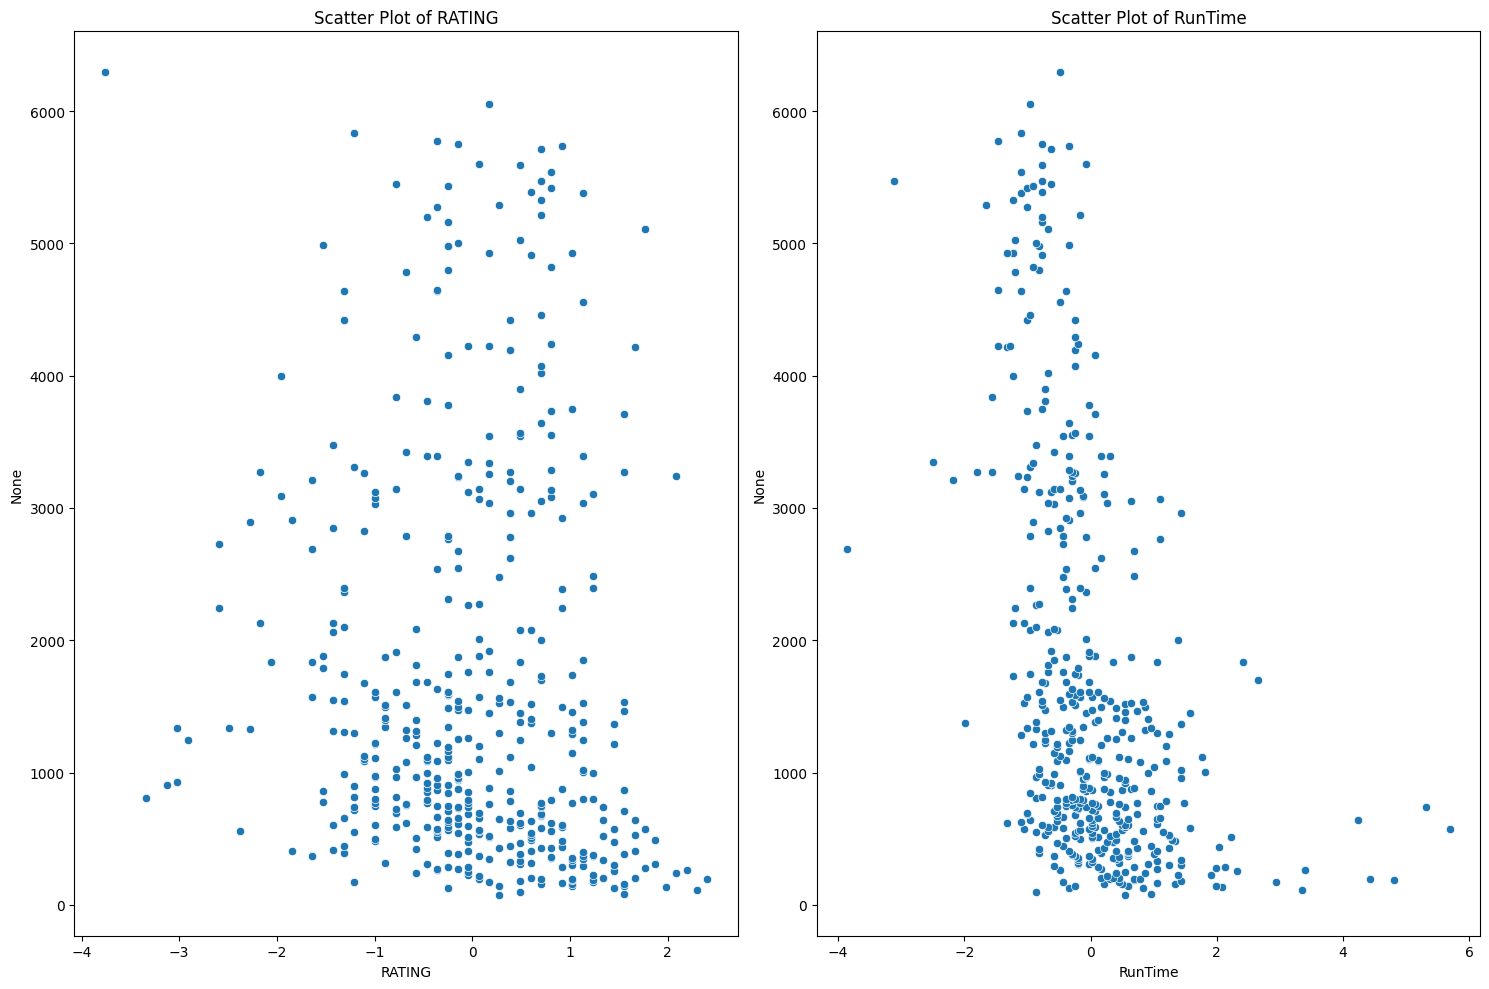

In [22]:
# Scatter plot of numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 2, 2, i + 1)
    sns.scatterplot(data=data_cleaned, x=feature, y=data_cleaned.index)
    plt.title(f'Scatter Plot of {feature}')
plt.tight_layout()
plt.show()



In [25]:
# Removing outliers
data_cleaned_no_outliers = data_cleaned.drop(outlier_indices, axis=0)
print(f"\nShape of the dataset after removing outliers: {data_cleaned_no_outliers.shape}")

# Save the cleaned dataset without outliers to a new CSV file
data_cleaned_no_outliers.to_csv('movies_cleaned_no_outliers.csv', index=False)
print("\nCleaned data without outliers saved to 'movies_cleaned_no_outliers.csv'")



Shape of the dataset after removing outliers: (446, 2394)

Cleaned data without outliers saved to 'movies_cleaned_no_outliers.csv'
